# Execution time

Execution time for three ligand sets:
- small - guanidine
- medium - ibuprofen
- bigger - sildenafil

For 10, 100, 500, 1000, and 5000 poses.

In [1]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2, style="ticks", rc={"axes.titlesize":24,"axes.labelsize":20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

In [14]:
fulldata = pd.read_csv("exec-time_all.tsv",
                       delimiter="\t", index_col=False)

fulldata

,ligand,number of poses,real,user,sys,run through
0,sildenafil,1000,3:44.63,213.76,0.90,python
1,sildenafil,100,0:22.19,21.39,0.35,python
2,sildenafil,10,0:02.62,2.73,0.26,python
3,sildenafil,5000,19:01.00,1084.20,3.64,python
4,sildenafil,500,1:54.61,109.21,0.47,python
...,...,...,...,...,...,...
295,guanidine,500,0:29.02,29.62,0.88,singularity
296,guanidine,500,0:27.90,28.51,0.85,singularity
297,guanidine,500,0:27.72,28.39,0.88,singularity
298,guanidine,500,0:28.44,29.03,0.85,singularity


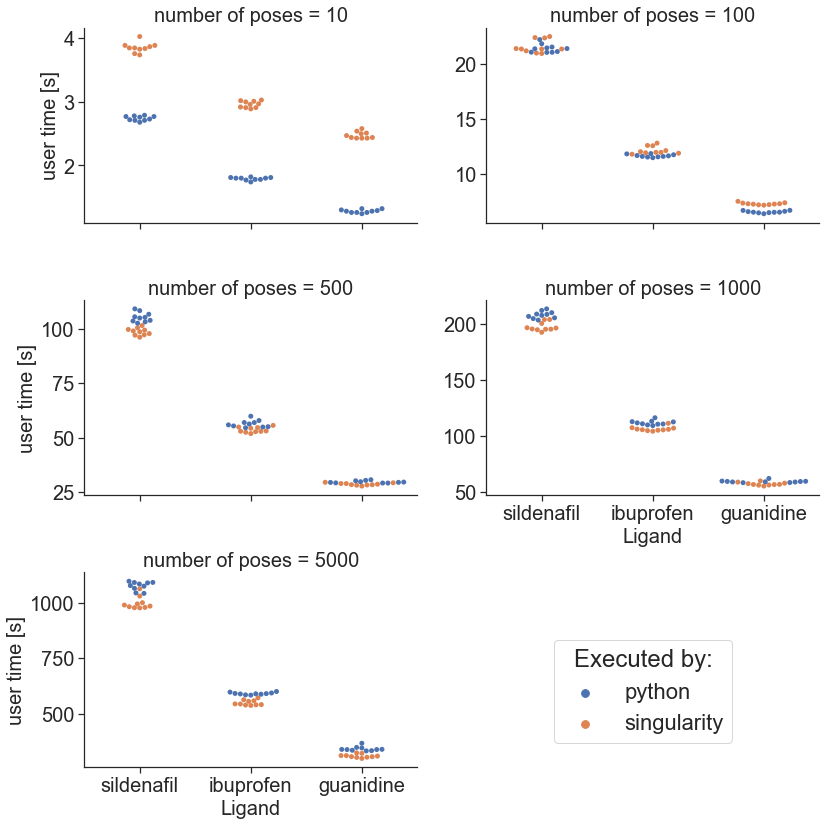

In [49]:
# Let's plot!

g = sns.catplot(x="ligand",
                y="user",
                hue="run through",
                col="number of poses",
                data=fulldata,
                kind="swarm",
                col_wrap=2,
                sharey=False,
                height=4,
                aspect=1.5,
                legend_out=False)

g.set_axis_labels("Ligand", "user time [s]")

sns.move_legend(g,
                "upper left",
                bbox_to_anchor=(.65, .25),
                title='Executed by:')

In [47]:
# some stats

pd.pivot_table(fulldata, values='user', index=['ligand', 'number of poses'],
                    columns=['run through'], aggfunc='mean')

run through                   python  singularity
ligand     number of poses                       
guanidine  10                  1.281        2.477
           100                 6.501        7.249
           500                29.823       28.744
           1000               59.462       57.254
           5000              342.286      310.042
ibuprofen  10                  1.791        2.962
           100                11.625       12.140
           500                56.455       53.642
           1000              111.915      106.434
           5000              591.041      549.643
sildenafil 10                  2.742        3.855
           100                21.425       21.598
           500               105.369       98.756
           1000              208.389      197.745
           5000             1075.484      997.598